In [144]:
import pandas as pd

import plotly.graph_objects as go

import plotly.express as px

import plotly.figure_factory as ff
import plotly.io as pio
import os

In [145]:
file_path=r'D:\JupyterCode\MyQuantFinProject\Data\RangeCrypto\ETH_050622_20Past_25-10Range.csv'
symbol="ETH"
#file_path=r'D:\JupyterCode\MyQuantFinProject\Data\RangeCrypto\ETH_Range_050622_30Past_15R.csv'

root_report_path='D:\JupyterCode\MyQuantFinProject\Report'

folder_report = os.path.splitext((os.path.split(file_path)[1]))[0]
print(file_path)
print(folder_report)


report_path=os.path.join(root_report_path,folder_report)
print(report_path)

D:\JupyterCode\MyQuantFinProject\Data\RangeCrypto\ETH_050622_20Past_25-10Range.csv
ETH_050622_20Past_25-10Range
D:\JupyterCode\MyQuantFinProject\Report\ETH_050622_20Past_25-10Range


In [146]:
range_df=pd.read_csv(file_path,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
range_df.info()
range_df.drop(columns='Ticker',inplace=True)

list_cols=list(range_df.columns)


#Cut only interval looking
fromDate='2022-01-25';
toDate='2022-06';

if fromDate!='' and toDate!='':
 df=range_df[fromDate:toDate]
else:
 df=range_df


df.head(10)
#df.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2022-05-05 to 2022-06-03
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ticker        30 non-null     object 
 1   _XHH15        30 non-null     float64
 2   _XLL15        30 non-null     float64
 3   _XMid15       30 non-null     float64
 4   Range15       30 non-null     float64
 5   _PctX_HtoL15  30 non-null     float64
 6   _PctX_LtoH15  30 non-null     float64
 7   _PctMidToH15  30 non-null     float64
 8   _PctMidToL15  30 non-null     float64
 9   _XHH30        30 non-null     float64
 10  _XLL30        30 non-null     float64
 11  _XMid30       30 non-null     float64
 12  Range30       30 non-null     float64
 13  _PctX_HtoL30  30 non-null     float64
 14  _PctX_LtoH30  30 non-null     float64
 15  _PctMidToH30  30 non-null     float64
 16  _PctMidToL30  30 non-null     float64
 17  Close         30 non-null     float64
dtypes: float64(1

,_XHH15,_XLL15,_XMid15,Range15,_PctX_HtoL15,_PctX_LtoH15,_PctMidToH15,_PctMidToL15,_XHH30,_XLL30,_XMid30,Range30,_PctX_HtoL30,_PctX_LtoH30,_PctMidToH30,_PctMidToL30,Close
Date/Time,,,,,,,,,,,,,,,,,
2022-05-05,3076.04,2726.66,2901.35,349.38,-11.36,12.81,6.02,-6.02,3406.99,2726.66,3066.82,680.33,-19.97,24.95,11.09,-11.09,2747.97
2022-05-06,3006.62,2726.66,2866.64,279.96,-9.31,10.27,4.88,-4.88,3258.57,2726.66,2992.61,531.91,-16.32,19.51,8.89,-8.89,2692.85
2022-05-07,3006.62,2692.85,2849.74,313.77,-10.44,11.65,5.51,-5.51,3258.57,2692.85,2975.71,565.72,-17.36,21.01,9.51,-9.51,2635.34
2022-05-08,3006.62,2635.34,2820.98,371.28,-12.35,14.09,6.58,-6.58,3258.57,2635.34,2946.96,623.23,-19.13,23.65,10.57,-10.57,2519.71
2022-05-09,3006.62,2519.71,2763.17,486.91,-16.19,19.32,8.81,-8.81,3258.57,2519.71,2889.14,738.86,-22.67,29.32,12.79,-12.79,2228.55
2022-05-10,3006.62,2228.55,2617.58,778.07,-25.88,34.91,14.86,-14.86,3203.04,2228.55,2715.79,974.49,-30.42,43.73,17.94,-17.94,2342.05
2022-05-11,2940.64,2228.55,2584.59,712.09,-24.22,31.95,13.78,-13.78,3118.28,2228.55,2673.42,889.73,-28.53,39.92,16.64,-16.64,2084.99
2022-05-12,2940.64,2084.99,2512.81,855.65,-29.10,41.04,17.03,-17.03,3118.28,2084.99,2601.64,1033.29,-33.14,49.56,19.86,-19.86,1960.22
2022-05-13,2940.64,1960.22,2450.43,980.42,-33.34,50.02,20.01,-20.01,3118.28,1960.22,2539.25,1158.06,-37.14,59.08,22.80,-22.80,2009.69


In [147]:
# create directory

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path) 
     print(report_path)   
     
except OSError as error:  
    raise error

D:\JupyterCode\MyQuantFinProject\Report\ETH_050622_20Past_25-10Range


# Plot scatter to view relation between difference range

In [148]:

#https://plotly.com/python/figure-factory-table/
def plot_dynamic_scatter(listColsToPlot,dfTable,title,y_title):
    #fig=go.Figure()
    fig =  ff.create_table(dfTable,height_constant=60) 
    
    for col_name in listColsToPlot:
     fig.add_trace (
        go.Scatter(x=df.index, y=df[col_name],
                   name=col_name,opacity=0.8,
                   xaxis='x2', yaxis='y2')
     )
    fig.update_layout(
    title_text = title,
    height = 800,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title':y_title}
    )
      
    return fig
def  manage_chart(dfx,colsToPlot,title,y_title):
    print(colsToPlot)
    dfTable=((dfx[colsToPlot]).reset_index()).tail(10)
    dfTable['Date/Time']=dfTable['Date/Time'].dt.strftime('%d-%b-%Y')
    dfTable=dfTable.rename(columns={'Date/Time':'Date'})
    #print(dfTable.info())
    fig_hml=None
    if len(colsToPlot)>0:
      fig_hml=plot_dynamic_scatter(colsToPlot,dfTable,title,y_title)
    return fig_hml

In [149]:
print(list_cols)

['_XHH15', '_XLL15', '_XMid15', 'Range15', '_PctX_HtoL15', '_PctX_LtoH15', '_PctMidToH15', '_PctMidToL15', '_XHH30', '_XLL30', '_XMid30', 'Range30', '_PctX_HtoL30', '_PctX_LtoH30', '_PctMidToH30', '_PctMidToL30', 'Close']


ETH_HH-LL
['_XHH15', '_XLL15', '_XMid15', '_XHH30', '_XLL30', '_XMid30']


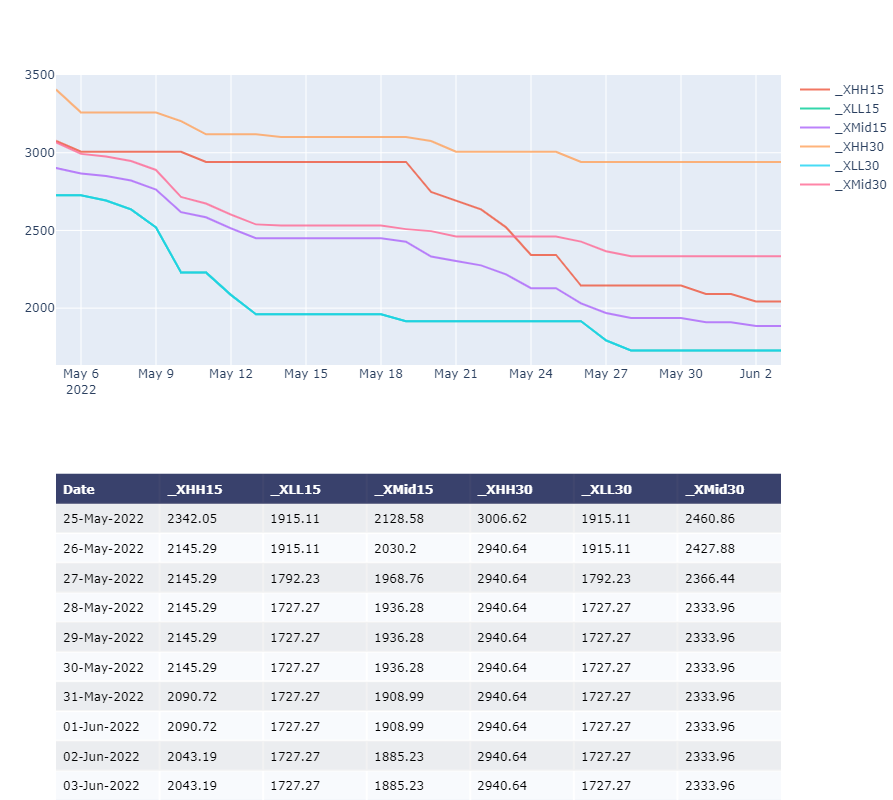

In [150]:
chartTitle1=f"{symbol}_HH-LL"
print(chartTitle1)
# colsToPlot=[  x for  x  in list_cols if x.startswith('_X') and ( x.startswith('_XMid')==False) ]
colsToPlot=[  x for  x  in list_cols if x.startswith('_X') ]
fig=manage_chart(df,colsToPlot,"",'')

pio.write_image(fig, f"{report_path}\\{chartTitle1}.png")
fig

ETH_HH-LL
['_PctX_HtoL15', '_PctX_LtoH15', '_PctX_HtoL30', '_PctX_LtoH30']


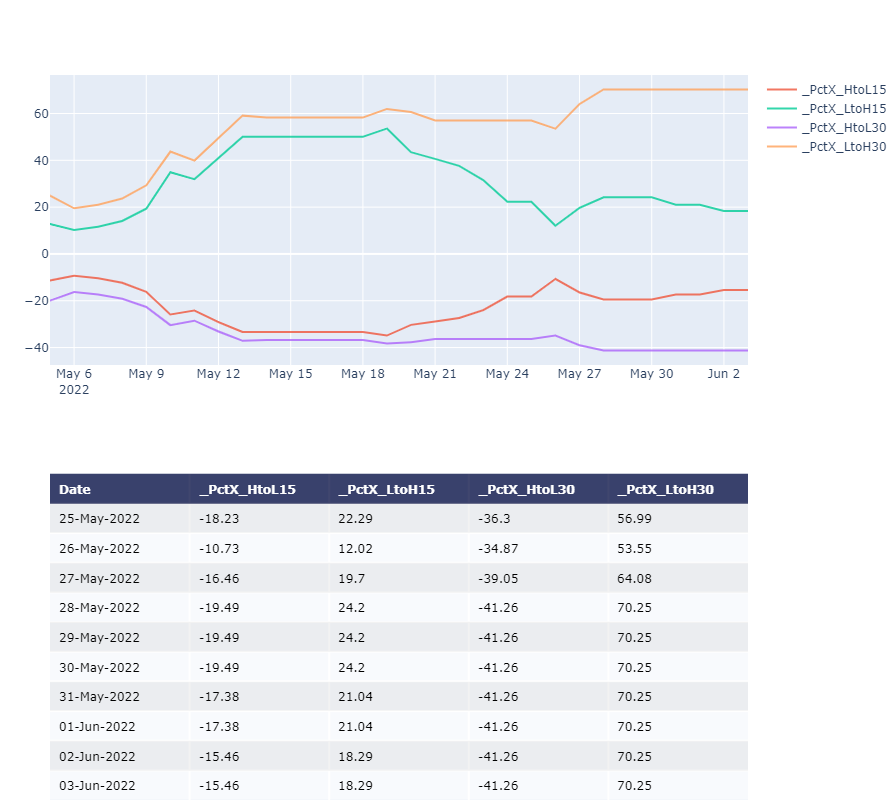

In [151]:
chartTitle2=f"{symbol}_PCT-HH-LL"
print(chartTitle1)
# colsToPlot=[  x for  x  in list_cols if x.startswith('_X') and ( x.startswith('_XMid')==False) ]
colsToPlot=[  x for  x  in list_cols if x.startswith('_PctX') ]
fig=manage_chart(df,colsToPlot,"",'')

pio.write_image(fig, f"{report_path}\\{chartTitle2}.png")
fig

ETH_HH-LL
['_PctMidToH15', '_PctMidToL15', '_PctMidToH30', '_PctMidToL30']


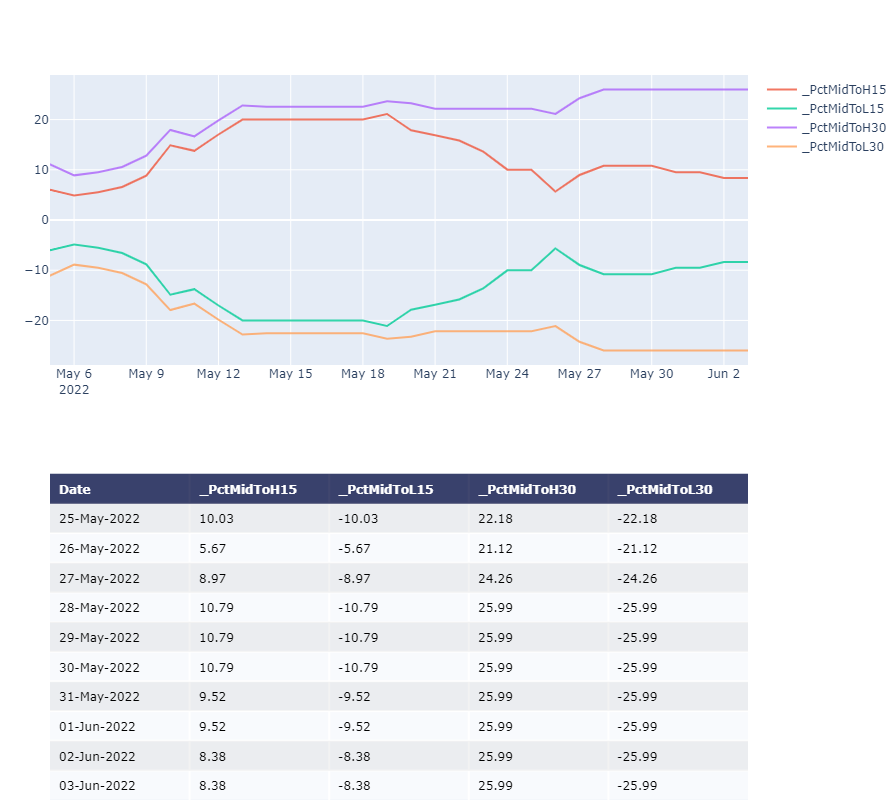

In [152]:
chartTitle3=f"{symbol}_PCT-Mid-HH"
print(chartTitle1)
# colsToPlot=[  x for  x  in list_cols if x.startswith('_X') and ( x.startswith('_XMid')==False) ]
colsToPlot=[  x for  x  in list_cols if x.startswith('_PctMidTo') ]
fig=manage_chart(df,colsToPlot,"",'')

pio.write_image(fig, f"{report_path}\\{chartTitle3}.png")
fig

In [153]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def plot_mutiple_histrogram(df,cols_name,rows):
  fig=make_subplots(rows=len(cols_name),cols=1,)  
  for x in range(rows):
     # print(cols_name[x],"-",x+1)
     fig.add_trace(go.Histogram(x=df[cols_name[x]],name=cols_name[x]) ,row=x+1,col=1)
        
  fig.update_layout( autosize=True,width=800,height=800, paper_bgcolor="LightSteelBlue",legend_orientation="h")

  return fig

['_XHH15', '_XLL15', '_XMid15', '_XHH30', '_XLL30', '_XMid30']


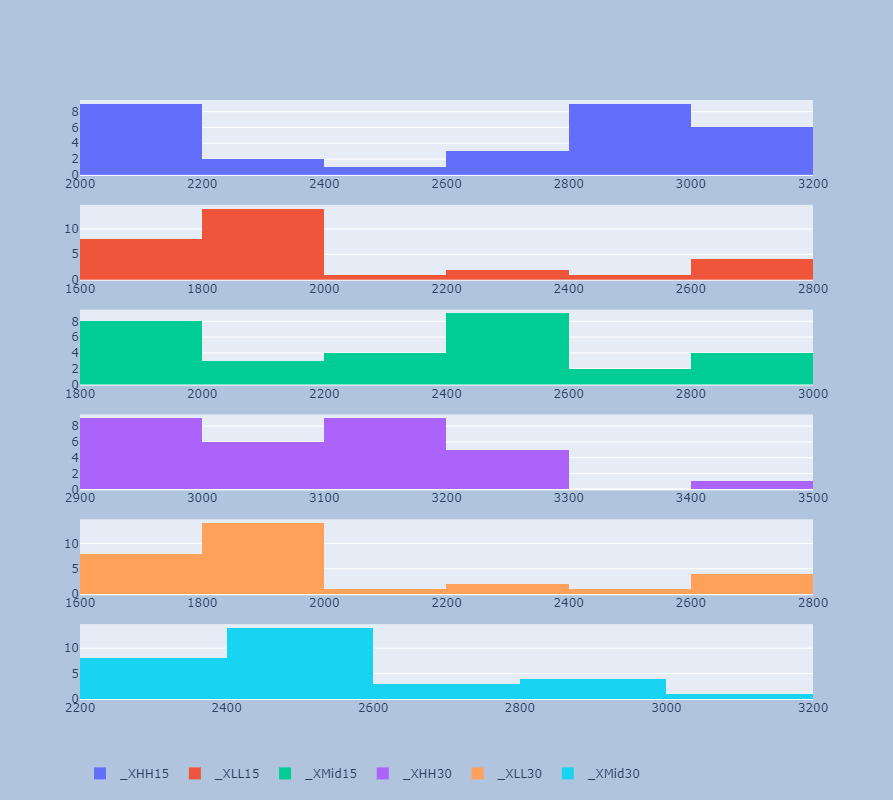

In [154]:
colsToDist_1=[  x for  x  in list_cols if x.startswith('_X') ]
print(colsToDist_1)
fig=plot_mutiple_histrogram(df,colsToDist_1,len(colsToDist_1))
pio.write_image(fig, f"{report_path}\\{symbol}_PriceDist.png")
fig

['_PctX_HtoL15', '_PctX_LtoH15', '_PctX_HtoL30', '_PctX_LtoH30']


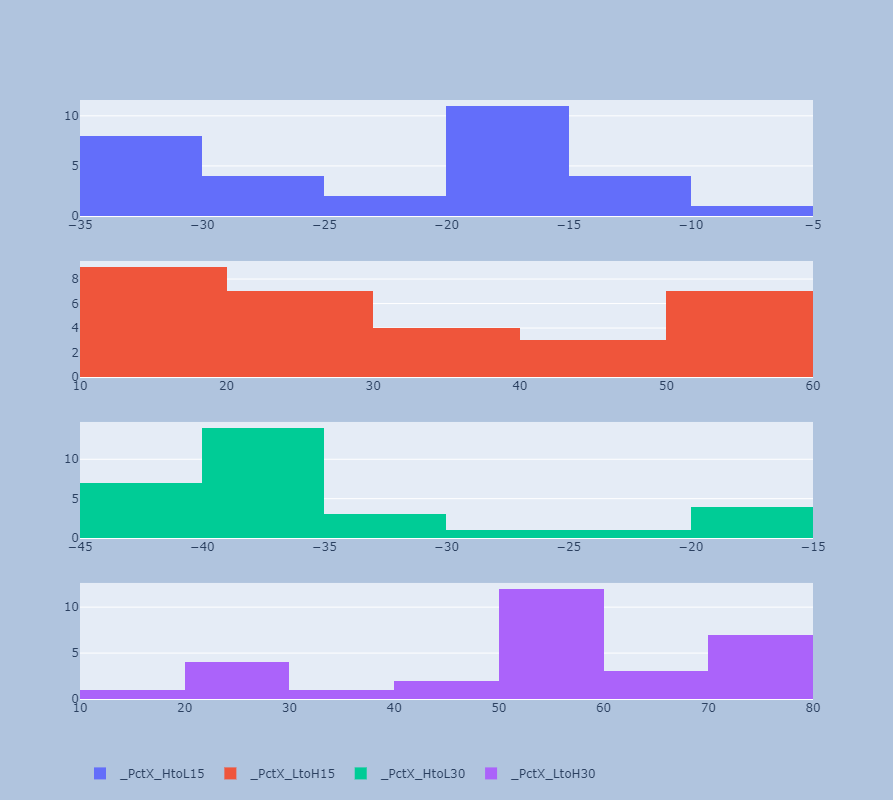

In [155]:
colsToDist_2=[  x for  x  in list_cols if x.startswith('_Pct') and (x.startswith('_PctMid')==False) ]
print(colsToDist_2)
fig=plot_mutiple_histrogram(df,colsToDist_2,len(colsToDist_2))
pio.write_image(fig, f"{report_path}\\{symbol}_HL_PccDist.png")
fig

['_PctMidToH15', '_PctMidToL15', '_PctMidToH30', '_PctMidToL30']


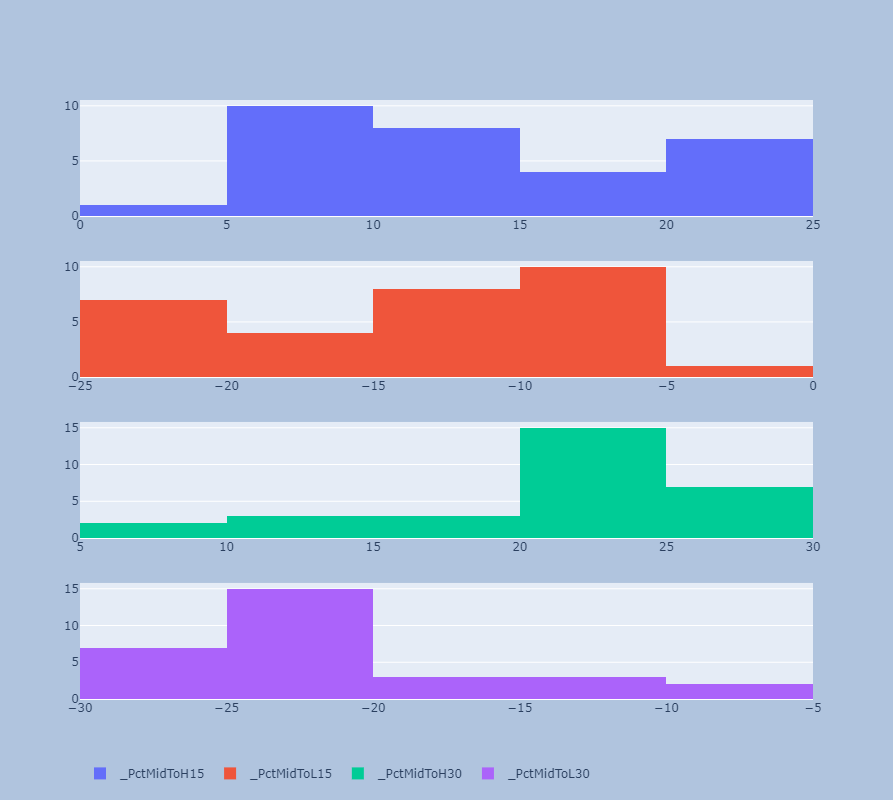

In [156]:
colsToDist_3=[  x for  x  in list_cols if x.startswith('_PctMid') ]
print(colsToDist_3)
fig=plot_mutiple_histrogram(df,colsToDist_3,len(colsToDist_3))
pio.write_image(fig, f"{report_path}\\{symbol}_Mid_PccDist.png")
fig